# Introduction

Salt Lake City is a growing metropolitan area. With a booming tech industry and major companies like Adobe, Microsoft, Facebook, and Vivint Solar building sites in northern Utah, population is increasing at a rapid rate in the Beehive State. With this growth comes many business opportunities for food services, such as dessert venues, in the major population center of Salt Lake City. Opening a restaurant of any sort is risky business, since many do not survive the first six months. Knowing prime locations to open venues is helpful in making an informed decision that may contribute to success Specifically, we will be examining areas of Salt Lake City to determine areas where someone interested in opening an ice cream parlor will most likely find success.

# Data

There are a few factors we can look at in determining what neighborhoods are good places to establish an ice cream venue. The number and type of restaurants in an area will give a clue as to which neighborhoods are already known for their food services. Moving to a neighborhood that already has several ice cream parlors means that the area's market will likely be saturated and unable to sustain another. The number of complementary businesses like stadiums, theatres, business districts, malls, and transportation hubs in a neighborhood also tends to have a positive correlation with the number of people who are likely to visit a dessert venue, since it is popular to get dessert after visiting these types of places. Restaurants that serve meals need to be considered separately, since they can be considered both competitors (since they often serve desserts as well as main courses) and complementary businesses (since people may visit an ice cream parlor for dessert after a meal). Population is another statistic that can be taken into account. While a larger population means that the ice cream parlor would be closer to homes (and thus easier to visit), it means that it will often be located further from complementary businesses and working areas. A population of zero in an area means that there are more businesses and less residential areas nearby. Both sides will be taken into account in comparing and pointing out which zip codes are likely good areas for an ice cream parlor. 

Foursquare analysis can be used to examine which neighborhoods have ice cream parlors, restaurants and complementary businesses. http://www.heartandcoeur.com/heart_travel/area/utah_801.php has a table of zip codes for the Salt Lake City, Utah area with neighborhoods listed. https://www.zip-codes.com/city/ut-salt-lake-city.asp has information about the population of these zip codes. In the case that attempts to pull latitude and longitude from geocoder does not work, http://saltlakecity.areaconnect.com/zip2.htm?city=Salt has that information that can be used to compile a .csv file.

A table will be compiled that identifies the number of various businesses in each zip code. Businesses will be grouped by complementary businesses (like those listed above), restaurants, competitors (various dessert venues) as well as populations for each zip code in a table that will be used for clustering zip codes and to analyze for indications which cluster of zip codes has characteristics that are desirable for starting an ice cream parlor (a higher number of complementary businesses and a lower number of competitors). 

## Collect Neighborhood Data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files

import requests

from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
SLC_data = requests.get("http://www.heartandcoeur.com/heart_travel/area/utah_801.php")
SLC_data

<Response [200]>

In [3]:
SLC_data.status_code

200

In [4]:
SLC_soup = BeautifulSoup(SLC_data.content, 'html.parser')

In [5]:
#print(SLC_soup.prettify())

In [5]:
data_rows = SLC_soup.findAll('tr')[2:]

postal_data = []  # create an empty list to hold all the data

for i in range(len(data_rows)-5):  # for each table row
    postal_row = []  # create an empty list for each postal code

    # for each table data element from each table row
    for td in data_rows[i].findAll('td'):        
        # get the text content and append to the player_row 
        postal_row.append(td.getText())        

    # then append each pick/player to the player_data matrix
    postal_data.append(postal_row)

In [6]:
#postal_data

In [6]:
# define the dataframe columns
column_names = ['Neighborhood', 'Zip Code', 'State', 'Area Code'] 

# instantiate the dataframe
df_SLC_neighborhoods = pd.DataFrame(postal_data, columns=column_names)

df_SLC_neighborhoods.head()

,Neighborhood,Zip Code,State,Area Code
0,Alpine - (Utah),84004,Utah,801
1,American Fork - (Utah),84003,Utah,801
2,Bingham Canyon - (Salt Lake),84006,Utah,801
3,Bountiful - (Davis),84010,Utah,801
4,Bountiful - (Davis),84011,Utah,801


In [8]:
df_SLC2 = df_SLC_neighborhoods.iloc[:,[0,1]]
df_SLC2.head()

,Neighborhood,Zip Code
0,Alpine - (Utah),84004
1,American Fork - (Utah),84003
2,Bingham Canyon - (Salt Lake),84006
3,Bountiful - (Davis),84010
4,Bountiful - (Davis),84011


In [9]:
#Selecting for only Zip codes in Salt Lake City
df_SLC3 = df_SLC2[df_SLC2['Neighborhood'].str.contains('Salt Lake City')].reset_index(drop=True)
df_SLC3

,Neighborhood,Zip Code
0,Salt Lake City - (Salt Lake),84101
1,Salt Lake City - (Salt Lake),84102
2,Salt Lake City - (Salt Lake),84103
3,Salt Lake City - (Salt Lake),84104
4,Salt Lake City - (Salt Lake),84105
5,Salt Lake City - (Salt Lake),84106
6,Salt Lake City - (Salt Lake),84107
7,Salt Lake City - (Salt Lake),84108
8,Salt Lake City - (Salt Lake),84109
9,Salt Lake City - (Salt Lake),84110


In [10]:
#!conda install -c conda-forge geocoder --yes
#import geocoder # import geocoder
#postal_codes = df_SLC3['Zip Code'].tolist()
#for postal_code in postal_codes:
    # initialize your variable to None
 #   lat_lng_coords = None

    # loop until you get the coordinates
   # while(lat_lng_coords is None):
    #  g = geocoder.google('{}, Salt Lake City, Utah'.format(postal_code))
    #  lat_lng_coords = g.latlng

   # latitude = lat_lng_coords[0]
   # longitude = lat_lng_coords[1]
    
   # df_SLC3.loc[['Postal Code'] == postal_code, 'Latitude'] = latitude
   # df_SLC3.loc[['Postal Code'] == postal_code, 'Longitude'] = longitude

I was unable to access geocoder to get the latitude and longitude, so I assembled a .csv file using data from the following websites and will load this .csv file for use in analysis

In [10]:
SLCNH = pd.read_csv('Salt Lake City Zip Codes.csv')
SLCNH.head(5)

,Zip codes,Latitude,Longitude,Population
0,84101,40.756,-111.899,5277
1,84102,40.759,-111.865,17421
2,84103,40.784,-111.876,21084
3,84104,40.750,-111.935,24869
4,84105,40.734,-111.856,22140


In [11]:
SLCNH = SLCNH.rename(index=str, columns={"Zip codes": "Zip Code"})
SLCNH.head()

,Zip Code,Latitude,Longitude,Population
0,84101,40.756,-111.899,5277
1,84102,40.759,-111.865,17421
2,84103,40.784,-111.876,21084
3,84104,40.750,-111.935,24869
4,84105,40.734,-111.856,22140


In [12]:
SLCNH.dtypes

Zip Code        int64
Latitude      float64
Longitude     float64
Population      int64
dtype: object

In [13]:
df_SLC3 = df_SLC3.convert_objects(convert_numeric=True)
df_SLC3.dtypes

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Neighborhood    object
Zip Code         int64
dtype: object

In [14]:
df_SLC4 = SLCNH.set_index('Zip Code').join(df_SLC3.set_index('Zip Code'))
df_SLC4.reset_index(inplace=True)
df_SLC4

,Zip Code,Latitude,Longitude,Population,Neighborhood
0,84101,40.756,-111.899,5277,Salt Lake City - (Salt Lake)
1,84102,40.759,-111.865,17421,Salt Lake City - (Salt Lake)
2,84103,40.784,-111.876,21084,Salt Lake City - (Salt Lake)
3,84104,40.750,-111.935,24869,Salt Lake City - (Salt Lake)
4,84105,40.734,-111.856,22140,Salt Lake City - (Salt Lake)
5,84106,40.703,-111.856,33384,Salt Lake City - (Salt Lake)
6,84107,40.659,-111.882,30863,Salt Lake City - (Salt Lake)
7,84108,40.738,-111.812,20863,Salt Lake City - (Salt Lake)
8,84109,40.701,-111.816,23858,Salt Lake City - (Salt Lake)
9,84110,40.756,-111.897,0,Salt Lake City - (Salt Lake)


In [15]:
#Importing packages for clustering and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [16]:
address = 'Salt Lake City, Utah'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Salt Lake City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Salt Lake City are 40.7670126, -111.8904308.


In [17]:
# create map of Salt Lake City using latitude and longitude values
map_SLC = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_SLC4['Latitude'], df_SLC4['Longitude'], df_SLC4['Zip Code']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SLC)  
    
map_SLC

### Foursquare Data

In [18]:
CLIENT_ID = '4KR0V5UPOSTFI3MTCTRF4VWXNNECKFPWDAOFIPRUBA4TM3MY' # your Foursquare ID
CLIENT_SECRET = 'PQYVUI1NKA4RGF13SATRN33H5NUSD5PPF5HH3CFL1GROKHNT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4KR0V5UPOSTFI3MTCTRF4VWXNNECKFPWDAOFIPRUBA4TM3MY
CLIENT_SECRET:PQYVUI1NKA4RGF13SATRN33H5NUSD5PPF5HH3CFL1GROKHNT


In [19]:
neighborhood_latitude = df_SLC4.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_SLC4.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_SLC4.loc[0, 'Zip Code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 84101 are 40.756, -111.899.


In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4KR0V5UPOSTFI3MTCTRF4VWXNNECKFPWDAOFIPRUBA4TM3MY&client_secret=PQYVUI1NKA4RGF13SATRN33H5NUSD5PPF5HH3CFL1GROKHNT&v=20180605&ll=40.756,-111.899&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
#results

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,R&R BBQ,BBQ Joint,40.755812,-111.900033
1,Starbucks,Coffee Shop,40.756728,-111.897669
2,Salt Lake Nails,Cosmetics Shop,40.756837,-111.897163
3,pictureline,Camera Store,40.753769,-111.900162
4,Brewvies Cinema Pub,Indie Movie Theater,40.754428,-111.895968


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


### Explore Salt Lake City in Greater Depth

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

In [26]:
#Use new function to find venues

SLC_venues = getNearbyVenues(names=df_SLC4['Zip Code'],
                                   latitudes=df_SLC4['Latitude'],
                                   longitudes=df_SLC4['Longitude']
                                  )


84101
84102
84103
84104
84105
84106
84107
84108
84109
84110
84111
84112
84113
84114
84115
84116
84117
84118
84119
84120
84121
84122
84123
84124
84125
84126
84127
84128
84130
84131
84132
84133
84134
84136
84138
84139
84141
84143
84144
84145
84147
84148
84150
84151
84152
84153
84157
84158
84165
84170
84171
84180
84184
84189
84190
84199


In [27]:
print(SLC_venues.shape)
SLC_venues.head()

(1050, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,84101,40.756,-111.899,R&R BBQ,40.755812,-111.900033,BBQ Joint
1,84101,40.756,-111.899,Starbucks,40.756728,-111.897669,Coffee Shop
2,84101,40.756,-111.899,Salt Lake Nails,40.756837,-111.897163,Cosmetics Shop
3,84101,40.756,-111.899,pictureline,40.753769,-111.900162,Camera Store
4,84101,40.756,-111.899,Brewvies Cinema Pub,40.754428,-111.895968,Indie Movie Theater


In [28]:
SLC_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
84101,34,34,34,34,34,34
84102,23,23,23,23,23,23
84103,1,1,1,1,1,1
84104,3,3,3,3,3,3
84105,12,12,12,12,12,12
84106,40,40,40,40,40,40
84107,19,19,19,19,19,19
84108,2,2,2,2,2,2
84109,3,3,3,3,3,3


In [29]:
print('There are {} uniques categories.'.format(len(SLC_venues['Venue Category'].unique())))

There are 199 uniques categories.


In [30]:
print(SLC_venues['Venue Category'].unique())

['BBQ Joint' 'Coffee Shop' 'Cosmetics Shop' 'Camera Store'
 'Indie Movie Theater' 'Clothing Store' 'Mexican Restaurant' 'Bakery'
 'Food Truck' 'Sporting Goods Shop' 'Thai Restaurant' 'Brewery' 'Hotel'
 'Hotel Bar' 'Sandwich Place' 'Nightclub' 'Indian Restaurant' 'Sports Bar'
 'Rental Car Location' 'Video Store' 'Restaurant' 'Diner' 'Music Venue'
 'Antique Shop' 'Sculpture Garden' 'Pizza Place' 'Steakhouse'
 'Massage Studio' 'Park' 'Convenience Store' 'Buffet'
 'Gym / Fitness Center' 'Fast Food Restaurant' 'Laundromat'
 'Paper / Office Supplies Store' 'Dive Bar' 'Bed & Breakfast'
 'Light Rail Station' 'Dessert Shop' 'Scandinavian Restaurant' 'Theater'
 'Juice Bar' 'Flower Shop' 'Pharmacy' 'Cupcake Shop' 'Grocery Store'
 'Burger Joint' 'Yoga Studio' 'Sushi Restaurant' 'Department Store'
 'Rock Club' 'Bagel Shop' 'Mobile Phone Shop' 'Thrift / Vintage Store'
 'Furniture / Home Store' "Women's Store" 'Salon / Barbershop'
 'Chinese Restaurant' 'Bank' 'Discount Store' 'Toy / Game Store'
 'Eas

### Narrow Data

In [31]:
list_Restaurant = ['BBQ Joint', 'Coffee Shop', 'Mexican Restaurant', 'Bakery', 'Food Truck', 'Thai Restaurant', 'Hotel Bar', 'Sandwich Place', 'Indian Restaurant', 'Sports Bar', 'Restaurant', 'Diner', 'Pizza Place', 'Steakhouse', 'Buffet', 
                   'Fast Food Restaurant', 'Dive Bar', 'Scandinavian Restaurant', 'Burger Joint', 'Sushi Restaurant', 'Bagel Shop', 'Chinese Restaurant', 'Italian Restaurant', 'Food', 'Asian Restaurant', 'American Restaurant',  'Deli / Bodega', 
                   'Eastern European Restaurant', 'Korean Restaurant', 'Greek Restaurant', 'Café', 'Seafood Restaurant', 'Ramen Restaurant', 'Spanish Restaurant', 'Breakfast Spot',  'Tex-Mex Restaurant', 'Food & Drink Shop', 'Vietnamese Restaurant' 
                   'Taco Place', 'Peruvian Restaurant', 'Fish Market', 'Food Court', 'Vegetarian / Vegan Restaurant', 'New American Restaurant', 'Japanese Restaurant', 'Comfort Food Restaurant', 'Beer Bar', 'German Restaurant', 'Fried Chicken Joint',
                   'Cocktail Bar', 'Irish Pub', 'Gastropub', 'Soup Place', 'Mediterranean Restaurant', 'Belgian Restaurant', 'Wings Joint', 'Noodle House', 'Gluten-free Restaurant', 'Brazilian Restaurant', 'Cafeteria', 'Whisky Bar',
                   'Street Food Gathering', 'Himalayan Restaurant', 'Hot Dog Joint', 'Pub', 'Taiwanese Restaurant', 'African Restaurant', 'Bar', 'Vietnamese Restaurant', 'Taco Place', 'Tea Room', 'Piano Bar', 'Speakeasy']
list_Business = ['Flower Shop', 'Salon / Barbershop', 'Bank', 'Construction & Landscaping', 'Lawyer', 'Automotive Shop', 'Home Service', 'Office', 'Rental Service',
                 'Business Service', 'Credit Union', 'IT Services', 'Locksmith', 'Check Cashing Service', 'Insurance Office', 'Brewery', 'Nutritionist', 'Moving Target', 'Print Shop']
list_Shopping = ['Cosmetics Shop', 'Camera Store', 'Clothing Store', 'Sporting Goods Shop', 'Video Store', 'Antique Shop', 'Convenience Store', 'Paper / Office Supplies Store', 'Hobby Shop', 'Music Store', 'Pharmacy', 'Grocery Store', 'Department Store',
                'Mobile Phone Shop', 'Thrift / Vintage Store', 'Furniture / Home Store', "Women's Store", 'Discount Store', 'Toy / Game Store', 'Arts & Crafts Store', 'Bookstore', 'Electronics Store', 'Farmers Market', 'Flea Market',
                'Shipping Store', 'Liquor Store', 'Market', 'Smoke Shop', 'Jewelry Store',  'Accessories Store', 'Boutique', 'Supplement Shop', 'Shoe Store', 'Kids Store', 'Supermarket', 'Record Shop', 'Gift Shop', "Men's Store", 'Gun Shop',
                 'Garden Center', 'Pet Store', 'Organic Grocery', 'Comic Shop', 'Gourmet Shop', 'Optical Shop', ]
list_Travel = ['Hotel', 'Rental Car Location', 'Light Rail Station', 'Hostel', 'Hotel Pool', 'Bed & Breakfast',  'Motel', 'RV Park', 'Intersection', 'Bus Station', 'Airport Service']
list_Attraction = ['Indie Movie Theater', 'Nightclub', 'Music Venue', 'Sculpture Garden', 'Park', 'Event Service', 'Theater', 'Rock Club', 'Plaza', 'Recreation Center', 'Skating Rink', 'Amphitheater', 'Rugby Pitch', 'Scenic Lookout', 'Museum', 
                   'Spiritual Center', 'Historic Site', 'History Museum', 'Bowling Alley', 'Baseball Field', 'Movie Theater', 'Multiplex', 'Hockey Arena', 'Student Center', 'Shopping Mall', 'Fountain', 'Concert Hall', 'Art Museum', 
                   'Tourist Information Center', 'Athletics & Sports', 'Festival', 'Pool', 'Art Gallery', 'Basketball Stadium', 'Planetarium', 'Comedy Club',  'Performing Arts Venue', 'College Science Building', 'Basketball Court', 'Trail', 'Tree']
list_Misc = ['Laundromat', 'ATM', 'Residential Building (Apartment / Condo)', 'Massage Studio', 'Gym / Fitness Center', 'Yoga Studio', 'Gym Pool', 'Gym', 'Golf Course', 'Spa', 'Medical Center', 'Health & Beauty Service']
list_Dessert = ['Dessert Shop', 'Juice Bar', 'Cupcake Shop', 'Donut Shop', 'Ice Cream Shop', 'Chocolate Shop', 'Candy Store', 'Bubble Tea Shop', 'Frozen Yogurt Shop']

In [32]:
SLC_venues2 = SLC_venues.replace(list_Restaurant, 'Restaurant')
SLC_venues2 = SLC_venues2.replace(list_Business, 'Business')
SLC_venues2 = SLC_venues2.replace(list_Shopping, 'Shopping')
SLC_venues2 = SLC_venues2.replace(list_Travel, 'Travel')
SLC_venues2 = SLC_venues2.replace(list_Attraction, 'Attraction')
SLC_venues2 = SLC_venues2.replace(list_Misc, 'Misc')
SLC_venues2 = SLC_venues2.replace(list_Dessert, 'Dessert')
print(SLC_venues2['Venue Category'].unique())

['Restaurant' 'Shopping' 'Attraction' 'Business' 'Travel' 'Misc' 'Dessert']


In [33]:
SLC_venues2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,84101,40.756,-111.899,R&R BBQ,40.755812,-111.900033,Restaurant
1,84101,40.756,-111.899,Starbucks,40.756728,-111.897669,Restaurant
2,84101,40.756,-111.899,Salt Lake Nails,40.756837,-111.897163,Shopping
3,84101,40.756,-111.899,pictureline,40.753769,-111.900162,Shopping
4,84101,40.756,-111.899,Brewvies Cinema Pub,40.754428,-111.895968,Attraction


## Analyze Neighborhoods

In [34]:
# one hot encoding
SLC_onehot = pd.get_dummies(SLC_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SLC_onehot['Neighborhood'] = SLC_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SLC_onehot.columns[-1]] + list(SLC_onehot.columns[:-1])
SLC_onehot = SLC_onehot[fixed_columns]

SLC_onehot.head()

,Neighborhood,Attraction,Business,Dessert,Misc,Restaurant,Shopping,Travel
0,84101,0,0,0,0,1,0,0
1,84101,0,0,0,0,1,0,0
2,84101,0,0,0,0,0,1,0
3,84101,0,0,0,0,0,1,0
4,84101,1,0,0,0,0,0,0


In [35]:
SLC_grouped = SLC_onehot.groupby('Neighborhood').mean().reset_index()
SLC_grouped

,Neighborhood,Attraction,Business,Dessert,Misc,Restaurant,Shopping,Travel
0,84101,0.088235,0.029412,0.000000,0.000000,0.411765,0.235294,0.235294
1,84102,0.086957,0.000000,0.086957,0.173913,0.434783,0.130435,0.086957
2,84103,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,84104,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000
4,84105,0.083333,0.083333,0.166667,0.166667,0.083333,0.416667,0.000000
5,84106,0.050000,0.100000,0.025000,0.075000,0.300000,0.450000,0.000000
6,84107,0.263158,0.000000,0.000000,0.157895,0.368421,0.157895,0.052632
7,84108,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
8,84109,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000
9,84110,0.060606,0.000000,0.000000,0.000000,0.424242,0.212121,0.303030


In [36]:
num_top_venues = 5

for hood in SLC_grouped['Neighborhood']:
    print(hood)
    temp = SLC_grouped[SLC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

84101
        venue  freq
0  Restaurant  0.41
1    Shopping  0.24
2      Travel  0.24
3  Attraction  0.09
4    Business  0.03


84102
        venue  freq
0  Restaurant  0.43
1        Misc  0.17
2    Shopping  0.13
3  Attraction  0.09
4     Dessert  0.09


84103
        venue  freq
0  Attraction   1.0
1    Business   0.0
2     Dessert   0.0
3        Misc   0.0
4  Restaurant   0.0


84104
        venue  freq
0    Shopping  0.67
1  Restaurant  0.33
2  Attraction  0.00
3    Business  0.00
4     Dessert  0.00


84105
        venue  freq
0    Shopping  0.42
1     Dessert  0.17
2        Misc  0.17
3  Attraction  0.08
4    Business  0.08


84106
        venue  freq
0    Shopping  0.45
1  Restaurant  0.30
2    Business  0.10
3        Misc  0.08
4  Attraction  0.05


84107
        venue  freq
0  Restaurant  0.37
1  Attraction  0.26
2        Misc  0.16
3    Shopping  0.16
4      Travel  0.05


84108
        venue  freq
0  Attraction   0.5
1    Business   0.5
2     Dessert   0.0
3        Misc   0.

In [37]:
#Put into Pandas
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SLC_grouped['Neighborhood']

for ind in np.arange(SLC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SLC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,84101,Restaurant,Travel,Shopping,Attraction,Business,Misc,Dessert
1,84102,Restaurant,Misc,Shopping,Travel,Dessert,Attraction,Business
2,84103,Attraction,Travel,Shopping,Restaurant,Misc,Dessert,Business
3,84104,Shopping,Restaurant,Travel,Misc,Dessert,Business,Attraction
4,84105,Shopping,Misc,Dessert,Restaurant,Business,Attraction,Travel


# Clustering

In [39]:
# set number of clusters
kclusters = 5

SLC_grouped_clustering = SLC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SLC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 1, 2, 2, 2, 2, 4, 4, 3], dtype=int32)

In [40]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.rename(index=str, columns={"Neighborhood":"Zip Code"})
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood'].astype(str)
neighborhoods_venues_sorted.dtypes

Cluster Labels            int32
Neighborhood             object
1st Most Common Venue    object
2nd Most Common Venue    object
3rd Most Common Venue    object
4th Most Common Venue    object
5th Most Common Venue    object
6th Most Common Venue    object
7th Most Common Venue    object
dtype: object

In [41]:
# Convert to proper data type

SLC_merged = df_SLC4
SLC_merged['Zip Code'] = SLC_merged['Zip Code'].astype(str)
SLC_merged.dtypes


Zip Code         object
Latitude        float64
Longitude       float64
Population        int64
Neighborhood     object
dtype: object

In [42]:
# merge SLC_grouped with SLC_data to add latitude/longitude for each neighborhood
SLC_merged = SLC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip Code')

SLC_merged.head() 

,Zip Code,Latitude,Longitude,Population,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,84101,40.756,-111.899,5277,Salt Lake City - (Salt Lake),3.0,Restaurant,Travel,Shopping,Attraction,Business,Misc,Dessert
1,84102,40.759,-111.865,17421,Salt Lake City - (Salt Lake),2.0,Restaurant,Misc,Shopping,Travel,Dessert,Attraction,Business
2,84103,40.784,-111.876,21084,Salt Lake City - (Salt Lake),1.0,Attraction,Travel,Shopping,Restaurant,Misc,Dessert,Business
3,84104,40.750,-111.935,24869,Salt Lake City - (Salt Lake),2.0,Shopping,Restaurant,Travel,Misc,Dessert,Business,Attraction
4,84105,40.734,-111.856,22140,Salt Lake City - (Salt Lake),2.0,Shopping,Misc,Dessert,Restaurant,Business,Attraction,Travel


In [43]:
SLC_merged = SLC_merged.dropna(axis = 0, how ='any')
SLC_merged['Cluster Labels'] = SLC_merged['Cluster Labels'].astype(int)
SLC_merged.dtypes

Zip Code                  object
Latitude                 float64
Longitude                float64
Population                 int64
Neighborhood              object
Cluster Labels             int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
dtype: object

In [44]:
SLC_merged = SLC_merged.dropna(axis = 0, how ='any')


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SLC_merged['Latitude'], SLC_merged['Longitude'], SLC_merged['Zip Code'], SLC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
SLC_stacked = SLC_onehot.groupby('Neighborhood').mean().reset_index()
SLC_stacked['Neighborhood'] = SLC_stacked['Neighborhood'].astype(str)
SLC_stacked.head()

,Neighborhood,Attraction,Business,Dessert,Misc,Restaurant,Shopping,Travel
0,84101,0.088235,0.029412,0.000000,0.000000,0.411765,0.235294,0.235294
1,84102,0.086957,0.000000,0.086957,0.173913,0.434783,0.130435,0.086957
2,84103,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,84104,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000
4,84105,0.083333,0.083333,0.166667,0.166667,0.083333,0.416667,0.000000


In [47]:
SLC_add = SLC_merged[['Zip Code','Cluster Labels']]
SLC_add.head()

,Zip Code,Cluster Labels
0,84101,3
1,84102,2
2,84103,1
3,84104,2
4,84105,2


In [48]:
SLC_stacked = SLC_stacked.join(SLC_add.set_index('Zip Code'), on='Neighborhood')
SLC_stacked.head()

,Neighborhood,Attraction,Business,Dessert,Misc,Restaurant,Shopping,Travel,Cluster Labels
0,84101,0.088235,0.029412,0.000000,0.000000,0.411765,0.235294,0.235294,3
1,84102,0.086957,0.000000,0.086957,0.173913,0.434783,0.130435,0.086957,2
2,84103,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,84104,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,2
4,84105,0.083333,0.083333,0.166667,0.166667,0.083333,0.416667,0.000000,2


In [49]:
SLC_stacked2 = SLC_stacked.groupby('Cluster Labels').mean().reset_index()
SLC_stacked2

,Cluster Labels,Attraction,Business,Dessert,Misc,Restaurant,Shopping,Travel
0,0,0.034292,0.038049,0.009019,0.082508,0.732708,0.077947,0.025477
1,1,0.750000,0.000000,0.000000,0.000000,0.062500,0.000000,0.187500
2,2,0.134435,0.043564,0.041533,0.052598,0.389717,0.306135,0.032018
3,3,0.100627,0.031633,0.010989,0.022378,0.408198,0.082768,0.343408
4,4,0.166667,0.638889,0.000000,0.000000,0.000000,0.194444,0.000000


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

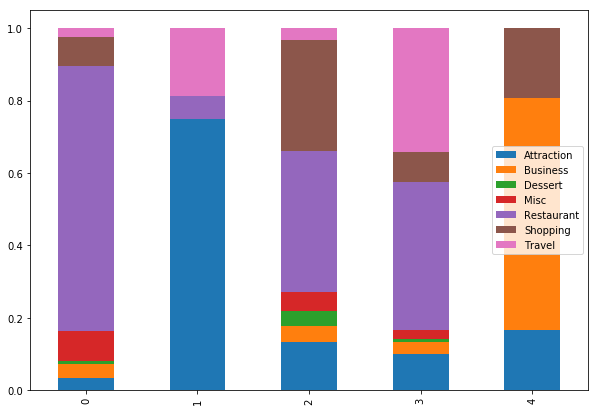

In [51]:
SLC_stacked2.loc[:,['Attraction','Business', 'Dessert','Misc','Restaurant','Shopping','Travel']].plot.bar(stacked=True, figsize=(10,7))

# Analyze Neighborhood Clusters

In [52]:
SLC_merged.loc[SLC_merged['Cluster Labels'] == 1, SLC_merged.columns[[1] + list(range(5, SLC_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
2,40.784,1,Attraction,Travel,Shopping,Restaurant,Misc,Dessert,Business
11,40.764,1,Travel,Attraction,Shopping,Restaurant,Misc,Dessert,Business
45,40.776,1,Attraction,Travel,Restaurant,Shopping,Misc,Dessert,Business
47,40.740,1,Attraction,Travel,Shopping,Restaurant,Misc,Dessert,Business


## Neighborhood Cluster 1

In [53]:
SLC_merged.loc[SLC_merged['Cluster Labels'] == 0, SLC_merged.columns[[1] + list(range(5, SLC_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
10,40.756,0,Restaurant,Misc,Travel,Shopping,Dessert,Business,Attraction
20,40.622,0,Restaurant,Shopping,Misc,Business,Travel,Dessert,Attraction
27,40.704,0,Restaurant,Travel,Shopping,Misc,Dessert,Business,Attraction
29,40.700,0,Restaurant,Travel,Shopping,Attraction,Misc,Dessert,Business
34,40.752,0,Restaurant,Shopping,Misc,Business,Travel,Dessert,Attraction
36,40.668,0,Restaurant,Travel,Shopping,Misc,Dessert,Business,Attraction
40,40.759,0,Restaurant,Attraction,Misc,Dessert,Business,Travel,Shopping
41,40.756,0,Restaurant,Misc,Business,Travel,Shopping,Dessert,Attraction
53,40.765,0,Restaurant,Shopping,Attraction,Misc,Dessert,Travel,Business


## Neighborhood Cluster 2

In [54]:
SLC_merged.loc[SLC_merged['Cluster Labels'] == 2, SLC_merged.columns[[1] + list(range(5, SLC_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,40.759,2,Restaurant,Misc,Shopping,Travel,Dessert,Attraction,Business
3,40.750,2,Shopping,Restaurant,Travel,Misc,Dessert,Business,Attraction
4,40.734,2,Shopping,Misc,Dessert,Restaurant,Business,Attraction,Travel
5,40.703,2,Shopping,Restaurant,Business,Misc,Attraction,Dessert,Travel
6,40.659,2,Restaurant,Attraction,Shopping,Misc,Travel,Dessert,Business
14,40.713,2,Restaurant,Shopping,Misc,Dessert,Business,Attraction,Travel
15,40.785,2,Restaurant,Attraction,Shopping,Travel,Misc,Dessert,Business
16,40.665,2,Restaurant,Shopping,Business,Attraction,Travel,Misc,Dessert
17,40.655,2,Restaurant,Shopping,Misc,Dessert,Business,Attraction,Travel
22,40.659,2,Attraction,Shopping,Restaurant,Travel,Misc,Dessert,Business


## Neighborhood Cluster 3

In [55]:
SLC_merged.loc[SLC_merged['Cluster Labels'] == 3, SLC_merged.columns[[1] + list(range(5, SLC_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,40.756,3,Restaurant,Travel,Shopping,Attraction,Business,Misc,Dessert
9,40.756,3,Restaurant,Travel,Shopping,Attraction,Misc,Dessert,Business
13,40.776,3,Restaurant,Attraction,Travel,Business,Shopping,Misc,Dessert
18,40.692,3,Travel,Shopping,Restaurant,Misc,Dessert,Business,Attraction
21,40.799,3,Travel,Shopping,Restaurant,Misc,Dessert,Business,Attraction
24,40.702,3,Restaurant,Travel,Attraction,Shopping,Misc,Dessert,Business
25,40.700,3,Restaurant,Travel,Shopping,Attraction,Misc,Dessert,Business
26,40.701,3,Restaurant,Travel,Attraction,Shopping,Misc,Dessert,Business
28,40.701,3,Restaurant,Travel,Attraction,Shopping,Misc,Dessert,Business
30,40.766,3,Travel,Restaurant,Attraction,Dessert,Shopping,Misc,Business


## Neighborhood Cluster 4

In [56]:
SLC_merged.loc[SLC_merged['Cluster Labels'] == 4, SLC_merged.columns[[1] + list(range(5, SLC_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
7,40.738,4,Business,Attraction,Travel,Shopping,Restaurant,Misc,Dessert
8,40.701,4,Business,Shopping,Travel,Restaurant,Misc,Dessert,Attraction
49,40.701,4,Business,Shopping,Travel,Restaurant,Misc,Dessert,Attraction


In [62]:
SLC_add

,Zip Code,Cluster Labels
0,84101,3
1,84102,2
2,84103,1
3,84104,2
4,84105,2
5,84106,2
6,84107,2
7,84108,4
8,84109,4
9,84110,3


In [64]:
SLC_add2 = SLC_add.astype(str)
SLC_R = SLC_add2[SLC_add2['Cluster Labels'].str.contains('1')])
SLC_R = SLC_R.append(SLC_add2[SLC_add2['Cluster Labels'].str.contains('4')])
SLC_R = SLC_R.reset_index(drop=True)
SLC_R

SyntaxError: invalid syntax (<ipython-input-64-7af7ce10d47e>, line 2)